# Task_1_Stock Prediction

## Name :- Gauri Ranade

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv('NSE-TATAGLOBAL.csv')
df=df.iloc[::-1]
df.head()

Date   Open    High     Low    Last   Close  Total Trade Quantity  \
2034  2010-07-21  122.1  123.00  121.05  121.10  121.55                658666   
2033  2010-07-22  120.3  122.00  120.25  120.75  120.90                293312   
2032  2010-07-23  121.8  121.95  120.25  120.35  120.65                281312   
2031  2010-07-26  120.1  121.00  117.10  117.10  117.60                658440   
2030  2010-07-27  117.6  119.50  112.00  118.80  118.65                586100   

      Turnover (Lacs)  
2034           803.56  
2033           355.17  
2032           340.31  
2031           780.01  
2030           694.98

In [3]:
df.tail()

Date    Open    High     Low    Last   Close  Total Trade Quantity  \
4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   
3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   

   Turnover (Lacs)  
4          7999.55  
3          5503.90  
2          5248.60  
1         11859.95  
0          7162.35

In [4]:
df.shape

(2035, 8)

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
df.describe()

Open         High          Low         Last       Close  \
count  2035.000000  2035.000000  2035.000000  2035.000000  2035.00000   
mean    149.713735   151.992826   147.293931   149.474251   149.45027   
std      48.664509    49.413109    47.931958    48.732570    48.71204   
min      81.100000    82.800000    80.000000    81.000000    80.95000   
25%     120.025000   122.100000   118.300000   120.075000   120.05000   
50%     141.500000   143.400000   139.600000   141.100000   141.25000   
75%     157.175000   159.400000   155.150000   156.925000   156.90000   
max     327.700000   328.750000   321.650000   325.950000   325.75000   

       Total Trade Quantity  Turnover (Lacs)  
count          2.035000e+03      2035.000000  
mean           2.335681e+06      3899.980565  
std            2.091778e+06      4570.767877  
min            3.961000e+04        37.040000  
25%            1.146444e+06      1427.460000  
50%            1.783456e+06      2512.030000  
75%            2.813594e+06      4539.015000  
max            2.919102e+07     55755.080000

In [8]:
#Data Preprocessing
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
duplicates= df.duplicated()
duplicates.value_counts() # no duplicates present

False    2035
dtype: int64

/tmp/ipykernel_87932/2590637935.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

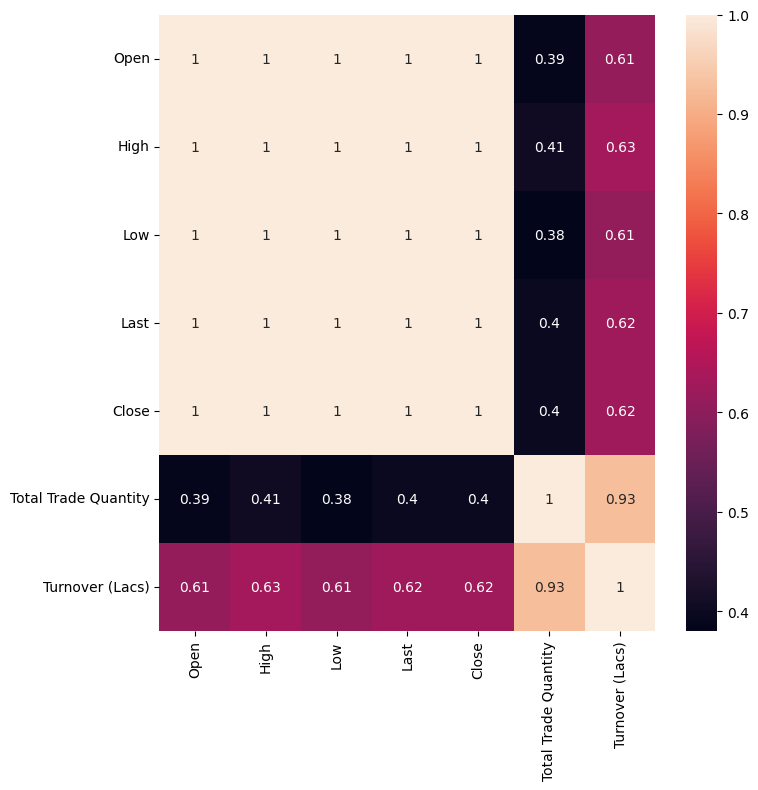

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

In [11]:
df_high=df.reset_index()['High']
plt.plot(df_high)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [13]:
df_high.shape

(2035, 1)

In [14]:
df_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [15]:
#Split the data into train and test split
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data,test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]

In [16]:
training_size, test_size

(1526, 509)

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [19]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [20]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [21]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

In [22]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

2023-11-14 08:14:25.361127: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-14 08:14:25.479344: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-14 08:14:25.479382: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-14 08:14:26.124161: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [23]:
# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

2023-11-14 08:14:26.881081: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-14 08:14:26.881127: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-14 08:14:26.881150: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dnyanesh-Inspiron-3583): /proc/driver/nvidia/version does not exist
2023-11-14 08:14:26.881441: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 14s 306ms/step - loss: 0.0089 - val_loss: 0.0234
Epoch 2/100
23/23 [==============================] - 4s 164ms/step - loss: 0.0016 - val_loss: 0.0061
Epoch 3/100
23/23 [==============================] - 3s 122ms/step - loss: 8.8228e-04 - val_loss: 0.0031
Epoch 4/100
23/23 [==============================] - 3s 129ms/step - loss: 7.4412e-04 - val_loss: 0.0033
Epoch 5/100
23/23 [==============================] - 3s 140ms/step - loss: 7.3365e-04 - val_loss: 0.0036
Epoch 6/100
23/23 [==============================] - 3s 142ms/step - loss: 7.2329e-04 - val_loss: 0.0037
Epoch 7/100
23/23 [==============================] - 3s 141ms/step - loss: 6.8251e-04 - val_loss: 0.0030
Epoch 8/100
23/23 [==============================] - 3s 141ms/step - loss: 6.9683e-04 - val_loss: 0.0024
Epoch 9/100
23/23 [==============================] - 3s 140ms/step - loss: 6.4429e-04 - val_loss: 0.0029
Epoch 10/100
23/23 [==============================] - 3s 139ms

23/23 [==============================] - 3s 152ms/step - loss: 1.5463e-04 - val_loss: 9.9185e-04
Epoch 79/100
23/23 [==============================] - 4s 168ms/step - loss: 1.5879e-04 - val_loss: 0.0017
Epoch 80/100
23/23 [==============================] - 4s 165ms/step - loss: 1.4041e-04 - val_loss: 0.0016
Epoch 81/100
23/23 [==============================] - 4s 178ms/step - loss: 1.3088e-04 - val_loss: 0.0011
Epoch 82/100
23/23 [==============================] - 3s 145ms/step - loss: 1.2686e-04 - val_loss: 0.0015
Epoch 83/100
23/23 [==============================] - 3s 143ms/step - loss: 1.3144e-04 - val_loss: 0.0016
Epoch 84/100
23/23 [==============================] - 3s 149ms/step - loss: 1.2346e-04 - val_loss: 0.0014
Epoch 85/100
23/23 [==============================] - 4s 170ms/step - loss: 1.2256e-04 - val_loss: 0.0017
Epoch 86/100
23/23 [==============================] - 4s 178ms/step - loss: 1.3010e-04 - val_loss: 0.0012
Epoch 87/100
23/23 [==============================] - 5

In [26]:
#predictions
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [27]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

135.38975645712648

In [29]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

228.182917213912

In [30]:
#Plotting
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

In [31]:
#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [32]:
#Predict the next 28 days Stock Price
len(test_data), x_test.shape

(509, (408, 100, 1))

In [33]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [34]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

[0.61218846]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 

8 day output [[0.42284137]]
9 day input [0.67310429 0.68428542 0.68936776 0.70217524 0.71803212 0.72941655
 0.73144948 0.74486684 0.76926205 0.75991055 0.74242732 0.73958122
 0.74771295 0.75991055 0.7584875  0.76621264 0.75462492 0.76316324
 0.79670665 0.80585485 0.7889815  0.78003659 0.73978451 0.73002643
 0.73490547 0.74872942 0.75991055 0.75462492 0.75401504 0.76174019
 0.7737345  0.82008538 0.80585485 0.81154706 0.77434438 0.78633869
 0.79284407 0.78328929 0.77109169 0.74385038 0.71193332 0.68733482
 0.67818662 0.65257166 0.64301687 0.65643423 0.67656028 0.67371417
 0.65114861 0.65521447 0.66761537 0.67838992 0.69993901 0.63122586
 0.63508843 0.64098394 0.64545639 0.64118723 0.63854442 0.63081927
 0.62472047 0.6330555  0.64728603 0.6574507  0.66761537 0.66720878
 0.64159382 0.62776987 0.63651149 0.63630819 0.62980281 0.62817646
 0.63813783 0.65358813 0.63183574 0.57653995 0.57816629 0.57613336
 0.61943484 0.57979264 0.57288067 0.62573694 0.63102257 0.6361049
 0.62776987 0.6269567  

16 day output [[0.38590842]]
17 day input [0.76926205 0.75991055 0.74242732 0.73958122 0.74771295 0.75991055
 0.7584875  0.76621264 0.75462492 0.76316324 0.79670665 0.80585485
 0.7889815  0.78003659 0.73978451 0.73002643 0.73490547 0.74872942
 0.75991055 0.75462492 0.75401504 0.76174019 0.7737345  0.82008538
 0.80585485 0.81154706 0.77434438 0.78633869 0.79284407 0.78328929
 0.77109169 0.74385038 0.71193332 0.68733482 0.67818662 0.65257166
 0.64301687 0.65643423 0.67656028 0.67371417 0.65114861 0.65521447
 0.66761537 0.67838992 0.69993901 0.63122586 0.63508843 0.64098394
 0.64545639 0.64118723 0.63854442 0.63081927 0.62472047 0.6330555
 0.64728603 0.6574507  0.66761537 0.66720878 0.64159382 0.62776987
 0.63651149 0.63630819 0.62980281 0.62817646 0.63813783 0.65358813
 0.63183574 0.57653995 0.57816629 0.57613336 0.61943484 0.57979264
 0.57288067 0.62573694 0.63102257 0.6361049  0.62776987 0.6269567
 0.63590161 0.62594023 0.6391543  0.62614353 0.62268754 0.61218846
 0.58842516 0.55494153

24 day output [[0.37451977]]
25 day input [0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0.57979264 0.57288067 0.62573694
 0.63102257 0.6361049  0.62776987 0.6269567  0.63590161 0.62594023
 0.6391543  0.62614353 0.62268754 0.61218846 0.58842516 0.55494153
 0.51661599 0.4864476  0.46536031 0.44926929 0.4352777  0.42284137
 0.41258013 0.4047468

In [35]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [36]:
day_new.shape

(100,)

In [37]:
day_pred.shape

(28,)

In [38]:
len(df_high)

2035

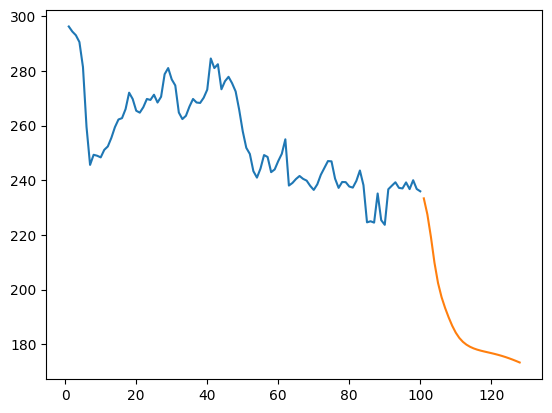

In [39]:
plt.plot(day_new, scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

In [40]:
data_new = df_high.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

In [41]:
data_new =scaler.inverse_transform(data_new).tolist()

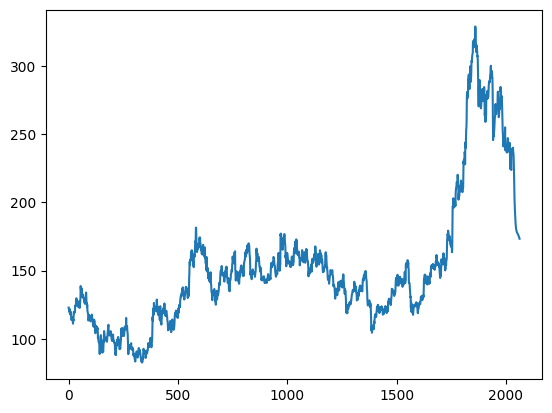

In [42]:
plt.plot(data_new)